<a href="https://colab.research.google.com/github/LucaT16/loc4tor/blob/master/Python%20Scripts/loc4tor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loc4tor

### Import TensorFlow

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
from PIL import Image
import os
import cv2
import tensorflow as tf
import random
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets, layers, models
from tensorflow.keras import losses 
import matplotlib.pyplot as plt

### Prepare and create the dataset

In [7]:
DATADIR = "../Bilder/"
CATEGORIES = ["Freiheitstatue","GoldenGateBridge"]
CROPPED = "Cropped"
IMG_SIZE = 244

In [3]:


training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        path = path + CROPPED
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    random.shuffle(training_data)
    x = []
    y = []

    for features, label in training_data:
        x.append(features)
        y.append(label)

    x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    y = np.array(y)

    pickle_out = open("x.pickle", "wb")
    pickle.dump(x, pickle_out)
    pickle_out.close()
    pickle_out = open("y.pickle", "wb")
    pickle.dump(y, pickle_out)
    pickle_out.close()
            
create_training_data()    

### Read Dataset

In [5]:
train_images = pickle.load(open("x.pickle","rb")) 
train_labels = pickle.load(open("y.pickle","rb")) 

train_images = train_images/255.0

train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2)


### Verify the data

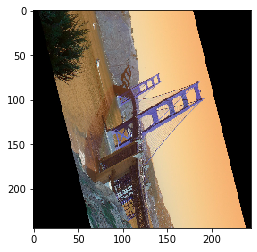

In [6]:
plt.imshow(train_images[0])
plt.show()


### Create the convolutional base

In [1]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape= (IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()

NameError: name 'models' is not defined

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Train on 1940 samples, validate on 216 samples
Epoch 1/10


### Evaluate the model

In [0]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [0]:
print(test_acc)